# **Welcome to `infer-subc`**
-----

## **<ins>Part 1</ins>: Segmentation Workflows**

`Part 1` of infer-subc carries out the segmentation of organelles from confocal microscopy images. The segmentation outputs will then be quantified for aspects of organelle morphology, inter-organelle interactions, and subcellular distribution in `Part 2 - Organelle Quantification`. The workflows have been optimized for the following experimental and imaging setup:

### **Compatable Organelles** 🔓🗝️
- `Lysosomes` (labeled with Lamp1-mTurquoise)
- `Mitochondria` (labeled with Cox8-signal sequence-GFP)
- `Golgi` (labeled with oxVenus-SiT1)
- `Peroxisomes` (labeled with mOrange-SKL)
- `Endoplasmic reticulum` (labeled with mApple-Sec61beta)
- `Lipid droplets` (labeled with BODIPY665 dye)
- `Cell` (labeled with a far-red plasma membrane-specific dye or derived from a composite of the organelle channels)
- `Nucleus`(labeled with BFP-NLS or derived from a composite of the organelle channels)

### **Image Format**
#### ➡️ Part 1 input image formatting:
The `infer-subc` segmentation workflows are optimized for use on fluoresence confocal microscopy images at ~63X magnification.

We have tested the following file formats as input in both the Napari `organelle-segmenter-plugin` and the Jupyter notebooks included here:

- Single or multi-channel ".tiff"/".tif" or ".czi" files
- 2D (single Z-plane) or 3D (Z-stack) images
- Dimension order: CZYX

*<ins>Note:</ins> We are utilizing [`AICSImageIO`](https://allencellmodeling.github.io/aicsimageio/aicsimageio.aics_image.AICSImage.html) AICSImage reader under the hood to import images and metadata, so other file types may be applicable. However, they have not yet been tested within `infer-subc`.*

#### Part 1 expected segmentation output: ➡️ 

Notebooks 1.1 through 1.7, will walk you through the segmentation process for the `Cell`, `Nucleus`, `Lysosomes`, `Mitochondria`, `Golgi`, `Peroxisomes`, `Endoplasmic reticulum`, `Lipid droplets`. Segmentation outputs, whether exported from these notebooks or from the Napari plugin during batch processing, will be saved as ".tiff" files. The organelle segmentations will include a single channel where each separate organelle object is labeled with a specific ID number. The "masks" (e.g., cell, cytoplasm, nucleus) file will stack the masks into a multichannel image that will need to be separate into “cell” and “nuc” files for quantification (see [quality_check_segmentations](quality_check_segmentations.ipynb) notebook for more details). There will only be one mask object per image and one ER object per image.

*If you have created segmentations with the following specifications using a different method, you can proceed to Part 2 for quantification.*

-----


## **Using Jupyter notebooks in `infer-subc`**

#### 📍 **Purpose of `Part 1: Segmentation Workflows` Notebooks:**

The Juptyer notebooks included here are expository examples of the segmentation workflows included in the Napari `organelle-segmenter-plugin`. They are intended to be:
1) a reference that links the steps in Napari `organelle-segmenter-plugin` and to the underlying `infer-subc` code,
2) an educational tool for understanding Python-based image segmentation, and 
3) an alternative to the Napari plugin "Workflow Editor". They can be used to identifying the appropriate settings for each segmentation workflow and then used in combination with the batch process segmentation notebook (an equivalent to the Napari plugin "Batch Processor"). The notebook options are well documented for those unfamiliar with Python, but also present an option to customize the pipelines further for those more familiar with Python-based image analysis.

*These notebooks contain the exact same steps as the `organelle-segmenter-plugin`.*

#### ✅ **Part 1: Segmentation Checklist:**
1. <input type="checkbox"/>  **Setup**
   
   Use [1.0_image_setup.ipynb](1.0_image_setup.ipynb) (this notebook) to ensure images can be read into memory and metadata is accessible
2. <input type="checkbox"/>  **Optimize Segmentation Settings for Masks**

   Use one of the three masking options (Notebook 1.1, 1.1a, or 1.1b) to segment a single cell and nucleus from your image; Notebooks 1.1 are utilized to optimize settings that can be applied during batch processing
3. <input type="checkbox"/>  **Optimize Segmentation Settings for your organelles of interest** 
   
   Use one or more of the organelle notebooks (Notebooks 1.2 through 1.7) to segment your organelles of interest; Notebooks 1.2 to 1.7 are utilized to optimize settings that can be applied during batch processing
4. <input type="checkbox"/>  **Batch process segmentations** 
   
   Use the [batch_process_segmentations](batch_process_segmentations.ipynb) notebook to batch process multiple images using the setting selected in Notebooks 1.1 through 1.7
5. <input type="checkbox"/>  **Quality check segmentations**

   Use the [quality_check_segmentations](quality_check_segmentations.ipynb) notebook to qualitatively confirm the efficacy of the batch processing. *This is highly recommended!*


#### 📖 **How to use Jupyter Notebooks:**  
 
Advance through each block of code below by pressing `Shift`+`Enter` or pressing the "Execute Cell" (`▶️`) button to the left of each block.
 

You will see a series of instructions before each block of code. Be on the look out for the following headers and follow the instructions accordingly:
- &#x1F3C3; **Run code; no user input required** - proceed without adding anything to the code block
- &#x1F453; **FYI** (for your information) - helpful information usually to bring context to what is going on
- &#x1F6D1; &#x270D; **User Input Required** - stop and input the appropriate information about your data. The following indicator will also be present in the code block:
   ```python 
   #### USER INPUT REQUIRED ###
   ```

-----

----- 

# **1.0 Image Setup**

The first thing we need to be able to do is access the image files and interact with them (e.g., read the metadata and visualize the image). The following notebook walks you through the steps used in all of the `part_1_segmentation_workflow` notebooks to load your image of choice. 

### 👣 **Summary of steps**  

**IMPORTS**

- **`Step 1`** - load all python packages necessary for this notebooks

**LOAD AND READ IN IMAGE FOR PROCESSING**

- **`Step 2`** - Select image from file list
- **`Step 3`** - Load image into memory and print the associated metadata

**VIZUALIZE THE IMAGE**

- **`Step 4`** - View the image using Napari

-----
## **IMPORTS**

#### &#x1F3C3; **Run code; no user input required**

&#x1F453; **FYI:** This code block loads all of the necessary python packages and functions you will need for this notebook. The convention with notebooks (and python in general) is to import the nescessary packages as the first thing. We are using `napari` for visualization. The underlying data format are [`numpy`](https://numpy.org/doc/stable/) [`ndarrays`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html).

In [1]:
# top level imports
from pathlib import Path
import os

import napari
from napari.utils.notebook_display import nbscreenshot
import pandas as pd

from infer_subc.core.file_io import (read_czi_image,
                                    list_image_files,
                                    sample_dirs,
                                    sample_input,
                                    create_quant)

%load_ext autoreload
%autoreload 2

-----
## **LOAD IMAGE AND READ IMAGE METADATA**

#### &#x1F6D1; &#x270D; **User Input Required:**

#### 📝 **Sample Data:**
 **If you would like to test this and the following notebooks in parts 1 and 2 with sample data, follow the steps below to set up the folder and download the raw image files.**

In [2]:
### USER INPUT REQUIRED ###
# Whether or not to create the subfolders needed to use the sample data folder
# If you do not wish to use the sample data set create equal to "False"
sample_dirs(create = True)

# Whether or not to create quantification folder which will hold batch segmentations used in quantification
create_quant(True)

Quantification subfolder has already been created


> #### ⬇️ **Downloading Sample Data**
> **The first two example images were featured in the recent preprint titled [Neurons and astrocytes have distinct organelle signatures and responses to stress](https://www.biorxiv.org/content/10.1101/2024.10.30.621066v1)**
>
> 
>
> ###### Click the links to **download** the raw microscopy images ⚠️ The files will begin downloading automatically when the links are clicked ⚠️
>
> Example Neuron_1 File: [20230727_C2-121_unconditioned_well 10_cell 4_25nM TG_Linear unmixing_0_cmle.ome.tiff](https://www.ebi.ac.uk/biostudies/files/S-BIAD1445/Neuron%20and%20astrocyte%20organelle%20signatures%20dataset/Primary%20rat%20neuron%20data/Z-stacks/replicate3_C2-121/C2-121_deconvolution/20230727_C2-121_conditioned_well%204_cell%203_untreated_Linear%20unmixing_0_cmle.ome.tiff) (💾 2.16 GB)
>
> ###### After downloading the example neuron file (1), move the .tiff image to the corresponding directory in the sample data folder.
>
>
> `infer-subc\sample_data\example_neuron_1\raw`
>

> Example Astrocyte File: [05052022_astro_control_2_Linear unmixing_0_cmle.ome](https://www.ebi.ac.uk/biostudies/files/S-BIAD1445/Neuron%20and%20astrocyte%20organelle%20signatures%20dataset/Primary%20rat%20astrocyte%20data/Z-stacks/replicate2_VD-0505/VD-0505_deconvolution/05052022_astro_control_2_Linear%20unmixing_0_cmle.ome.tiff) (💾 1.14 GB)
>
> ###### After downloading the example astrocyte file, move the .tiff image to the corresponding directory in the sample data folder.
>
>
> `infer-subc\sample_data\example_astrocyte\raw`
>

> Example Neuron_2 File: <mark>Put link here<mark> (💾 #### GB)
>
> ###### After downloading the example neuron file (2), move the .tiff image to the corresponding directory in the sample data folder.
>
>
> `infer-subc\sample_data\example_neuron_2\raw`
>

> Example IPSC File: <mark>Put link here<mark> (💾 #### GB)
>
> ###### After downloading the example ipsc file, move the .tiff image to the corresponding directory in the sample data folder.
>
>
> `infer-subc\sample_data\example_ipsc\raw`
>

> ###### 💾 You can now run all of the notebooks in part 1 of infer-subc using the sample data and entering the recommended parameters in the "&#x1F6D1; &#x270D; **User Input Required:**" fields. After running all of the notebooks in part 1, and completing quantification in part 2, the sample data folder will around 14 GB in size. Ensure that there is enough space on your drive to do so.

ℹ️ **The sample data is already set up for use if the repository is cloned locally. For more information regarding cloning the repository, refer to the [github.io](https://ndcn.github.io/infer-subc/) site for infer_subc**

#### &#x1F6D1; &#x270D; **User Input Required:**

Please specify the following information about your data:
- `im_type`: the file type of your image written in quotation marks; EX: ".czi" or ".tiff"
- `data_root_path`: the path to folder that contains subfolders, including your input data and a separate folder for segmentation outputs to be saved; EX: "C:/Users/{your-user-name}/Documents/Exp1"
- `in_data_path`: the path to the folder that contains your input data; EX: data_root_path / "input"
- `out_data_path`: the path to the folder where segmentation output files will be saved; EX: data_root_path / "segmentations"


Follow this example's formatting:
> ```python 
> im_type = ".czi"
> data_root_path = Path(os.path.expanduser("~")) / "Documents/Python_Scripts/Infer-subc"
> in_data_path = data_root_path / "raw"
> out_data_path = data_root_path / "out"
> ```

In [ ]:
### USER INPUT REQUIRED ###
# If using the sample data, select which cell type you would like analyze ("neuron_1", "astrocyte", "neuron_2" or "ipsc"):
# If not using the sample data, set cell_type to None
sample_data_type = "astrocyte"

# If you are not using the sample data, please edit "USER SPECIFIED" as necessary.

## Define the path to the directory that contains the input image folder.
data_root_path = Path("USER SPECIFIED")

# Specify the file type of your raw data that will be analyzed. Ex) ".czi" or ".tiff"
im_type = "USER SPECIFIED"

## Specify which subfolder that contains the input data and the input data file extension
in_data_path = data_root_path / "USER SPECIFIED"

## Specify the output folder to save the segmentation outputs if.
## If its not already created, the code below will create it for you
out_data_path = data_root_path / "USER SPECIFIED"

08-Jun-25 15:43:53 - tifffile.tifffile - WARNING  - <tifffile.TiffFrame 316 @805060750> is missing required tags
08-Jun-25 15:43:53 - tifffile.tifffile - WARNING  - <tifffile.TiffFile '01202024_MSi08L…_0_cmle.ome.tiff'> OME series contains index out of range


#### &#x1F3C3; **Run code; no user input required**
&#x1F453; **FYI:** 
- A list of the images included in the `in_data_path` folder is printed below for easy reference.
- If the `out_data_path` folder does not exist, it will be created now.

In [4]:
# If sample_data_type is set to "neuron_1", "astrocyte", "neuron_2" or "ipsc" then the sample data is used and the directories are set
if sample_data_type != None:
    data_root_path, im_type, in_data_path, out_data_path = sample_input(sample_data_type)

# Create the output directory to save the segmentation outputs in.
if not Path.exists(out_data_path):
    Path.mkdir(out_data_path)
    print(f"making {out_data_path}")

# Create a list of the file paths for each image in the input folder. Select test image path.
img_file_list = list_image_files(in_data_path,im_type)
pd.set_option('display.max_colwidth', None)
pd.DataFrame({"Image Name":img_file_list})

,Image Name
0,c:\Users\redre\Documents\CohenLab\scohen_lab_repo\infer-subc\sample_data\example_astrocyte\raw\05052022_astro_control_2_Linear unmixing_0_cmle.ome.tiff


#### &#x1F6D1; &#x270D; **User Input Required:**

Use the list above to specify which image you wish to analyze:
- `test_img_n`: the index, or number, associated with your image of choice from the list above.


Follow this example's formatting:
> ```python 
> test_img_n = 5
> ```

In [5]:
#### USER INPUT REQUIRED ###
test_img_n = 0

#### &#x1F3C3; **Run code; no user input required**

&#x1F453; **FYI:** This code block reads the image and image metadata into memory. Then, the metadata is printed.

In [6]:
# Read in the image and metadata as an ndarray and dictionary from the test image selected above. 
test_img_name = img_file_list[test_img_n]
img_data,meta_dict = read_czi_image(test_img_name)

# Define some of the metadata features and print them.
channel_names = meta_dict['name']
meta = meta_dict['metadata']['aicsimage']
scale = meta_dict['scale']
channel_axis = meta_dict['channel_axis']
file_path = meta_dict['file_name']

print("Metadata information")
print(f"File path: {file_path}")
for i in list(range(len(channel_names))):
    print(f"Channel {i} name: {channel_names[i]}")
print(f"Scale (ZYX): {scale}")
print(f"Channel axis: {channel_axis}")

Metadata information
File path: c:\Users\redre\Documents\CohenLab\scohen_lab_repo\infer-subc\sample_data\example_astrocyte\raw\05052022_astro_control_2_Linear unmixing_0_cmle.ome.tiff
Channel 0 name: 05052022_astro_control_2_Linear unmixing_0_cmle.ome :: Channel:0
Channel 1 name: 05052022_astro_control_2_Linear unmixing_0_cmle.ome :: Channel:1
Channel 2 name: 05052022_astro_control_2_Linear unmixing_0_cmle.ome :: Channel:2
Channel 3 name: 05052022_astro_control_2_Linear unmixing_0_cmle.ome :: Channel:3
Channel 4 name: 05052022_astro_control_2_Linear unmixing_0_cmle.ome :: Channel:4
Channel 5 name: 05052022_astro_control_2_Linear unmixing_0_cmle.ome :: Channel:5
Scale (ZYX): (0.396091, 0.079947, 0.079947)
Channel axis: 0


-----
## **VISUALIZE THE IMAGE**

#### &#x1F3C3; **Run code; no user input required**

&#x1F453; **FYI:** This code block opens your image in Napari. The Napari graphical user interface (GUI) will open as a separate window. You can learn more about how to use the Napari GUI [here](https://napari.org/stable/tutorials/fundamentals/quick_start.html).

Proceed to Napari window to view your selected image.


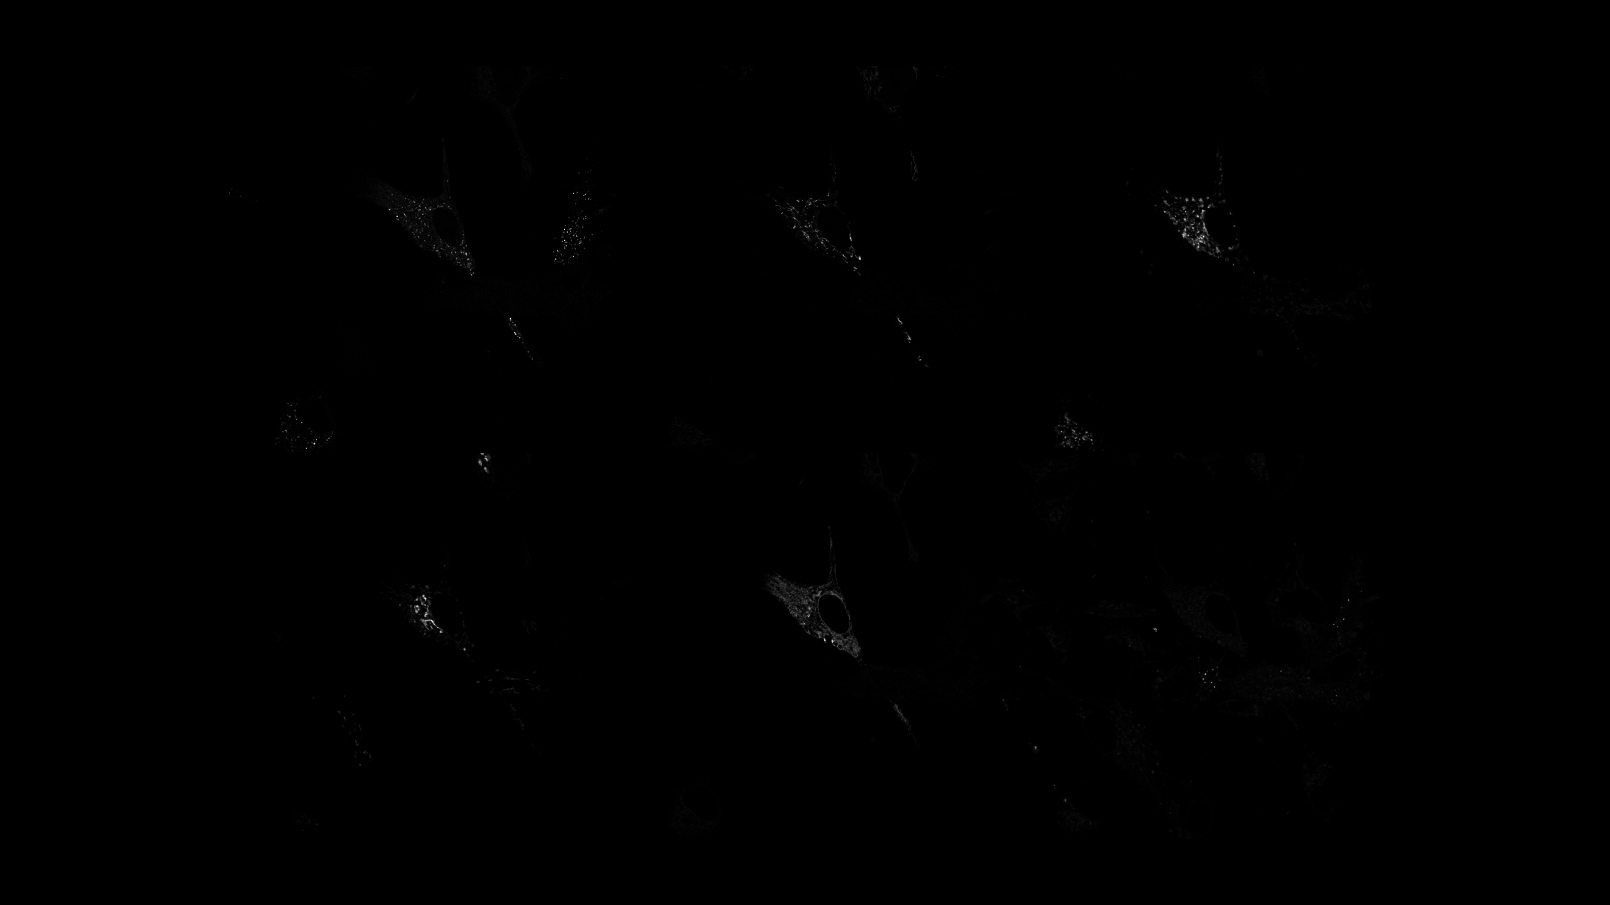

In [7]:
# open viewer and add images
viewer = napari.Viewer()
for i in list(range(len(channel_names))):
    viewer.add_image(img_data[i],
                     scale=scale,
                     name=f"Channel {i}")
viewer.grid.enabled = True
viewer.reset_view()
    
print("Proceed to Napari window to view your selected image.")

# screenshot viewer
nbscreenshot(viewer, canvas_only = True)

--------------
### **NEXT STEPS**

Proceed to **one** of the `1.1_infer_masks` notebooks to segment a single cell from your images. Use the following table to decide which `Masks Workflow` is applicable to your images:

| **Imaging Requirements**|[**Masks Workflow**](./1.1_infer_masks_from-composite_with_nuc.ipynb)|[**Masks Workflow (A)**](./1.1a_infer_masks_from-composite_single_cell.ipynb)|[**Masks Workflow (B)**](./1.1b_infer_masks_from-composite_multiple-cells.ipynb)|[**Masks Workflow (C)**](./1.1c_infer_masks_from-composite_neuron_with_pm.ipynb)|[**Masks Workflow (D)**](./1.1d_infer_masks_from-composite_ipsc.ipynb)|
| :------------------------------------- |  :------:  |  :------:  |  :------:  |  :------:  |  :------:  |
| Nuclei Marker                          |     ✔     |      ✘     |     ✘     |     ✔     |     ✔     |
| Cell Membrane Marker                   |     ✘     |      ✘     |     ✘     |     ✔     |     ✔     |
| Cytoplasmic Organelles                 |     ✔     |      ✔     |     ✔     |     ✔     |     ✔     |
| Number of cells per image              |  Single or Multiple  |   Single   |  Single or Multiple |  Single or Multiple |  Single or Multiple |
| Applicable with sample data         |  ✘  |   Neuron_1   |  Astrocyte | Neuron_2| IPSC|


**Summary of the Masks Workflows described above:**
- [**Masks Workflow**](./1.1_infer_masks_from-composite_with_nuc.ipynb) - for images with cytoplasmic organelles, a **nuclei** marker, NO **cell membrane** makers, and one or more cells per field of view *(not yet applicable with sample data)*
- [**Masks Workflow (A)**](./1.1a_infer_masks_from-composite_single_cell.ipynb) - for images with only cytoplasmic organelles, NO **nuclei** or **cell membrane** makers, one cell per field of view
- [**Masks Workflow (B)**](./1.1b_infer_masks_from-composite_multiple-cells.ipynb) - for images with only cytoplasmic organelles, NO **nuclei** or **cell membrane** makers, and more than one cell per field of view
- [**Masks Workflow (C)**](./1.1c_infer_masks_from-composite_neuron_with_pm.ipynb) - for images with only cytoplasmic organelles, BOTH **nuclei** and **cell membrane** makers, and one or more cells per field of view (for Neurons)
- [**Masks Workflow (D)**](./1.1d_infer_masks_from-composite_ipsc.ipynb) - for images with only cytoplasmic organelles, BOTH **nuclei** and **cell membrane** makers, and one or more cells per field of view (for IPSCs)
